In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.utils import np_utils
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [2]:
import tensorflow
KERAS_BACKEND=tensorflow

In [3]:
print(tensorflow.__version__)

2.0.0


In [4]:
train=pd.read_csv('mnist_train.csv')
test=pd.read_csv('mnist_test.csv')

In [5]:
(train.shape),(test.shape)

((60000, 785), (10000, 785))

In [6]:
X_train=train.iloc[:,1:].values

In [7]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
Y_train=train.iloc[:,0].values

In [9]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [10]:
X_test=test.iloc[:,1:].values
Y_test=test.iloc[:,0].values

In [11]:
(X_train.shape),(X_test.shape),(Y_train.shape),(Y_test.shape)

((60000, 784), (10000, 784), (60000,), (10000,))

In [12]:
#converting y into one hot encoding with 10 class
Y_train=np_utils.to_categorical(Y_train,10)

In [13]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
Y_test=np_utils.to_categorical(Y_test,10)

In [15]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [16]:
Y_test.shape

(10000, 10)

In [17]:
X_train[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [18]:
#normalizing the data 
X_train=X_train/255
X_test=X_test/255

In [19]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
#initializing some parameeters
nb_epoch=25
input_dim=X_train.shape[1]
output_dim=10
batch_size=150

In [21]:
from tensorflow.keras.models import Sequential

In [22]:
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.initializers import RandomNormal

# Adam optimizer without dropout and BN

In [23]:
#building an arch of a model
model=Sequential()
model.add(Dense(392,input_shape=(input_dim,),activation='relu',kernel_initializer=RandomNormal(mean=0,stddev=0.071,seed=None)))#hidden layer 1
model.add(Dense(196,activation='relu',kernel_initializer=RandomNormal(mean=0,stddev=0.101,seed=None)))#hidden layer 2
model.add(Dense(output_dim,activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 392)               307720    
_________________________________________________________________
dense_1 (Dense)              (None, 196)               77028     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1970      
Total params: 386,718
Trainable params: 386,718
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,Y_train,batch_size=batch_size,epochs=nb_epoch,verbose=1,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2420 - accuracy: 0.9281 - val_loss: 0.1101 - val_accuracy: 0.9658
Epoch 2/25
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0904 - accuracy: 0.9727 - val_loss: 0.0801 - val_accuracy: 0.9755
Epoch 3/25
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0588 - accuracy: 0.9820 - val_loss: 0.0792 - val_accuracy: 0.9751
Epoch 4/25
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0405 - accuracy: 0.9878 - val_loss: 0.0762 - val_accuracy: 0.9760
Epoch 5/25
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0278 - accuracy: 0.9913 - val_loss: 0.0693 - val_accuracy: 0.9790
Epoch 6/25
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0206 - accuracy: 0.9935 - val_loss: 0.0706 - val_accuracy: 0.9792
Epoch 7/25
60000/60000 [==============================] 

In [26]:
score=model.evaluate(X_test,Y_test)
print("Val score:",score[0])
print("Accuracy:",score[1])

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Val score: 0.09708132764984803
Accuracy: 0.982


In [27]:
#Plotting the model
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

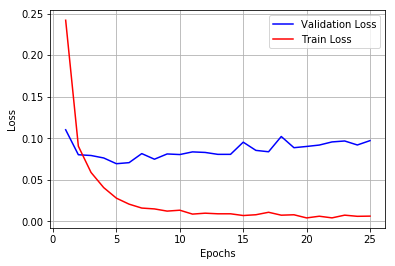

In [28]:
fig,ax=plt.subplots(1,1)
ax.set_xlabel("Epochs"),ax.set_ylabel('Loss')
x=list(range(1,nb_epoch+1))
vy=history.history['val_loss']
ty=history.history['loss']
plt_dynamic(x,vy,ty,ax)

In [29]:
import seaborn as sns

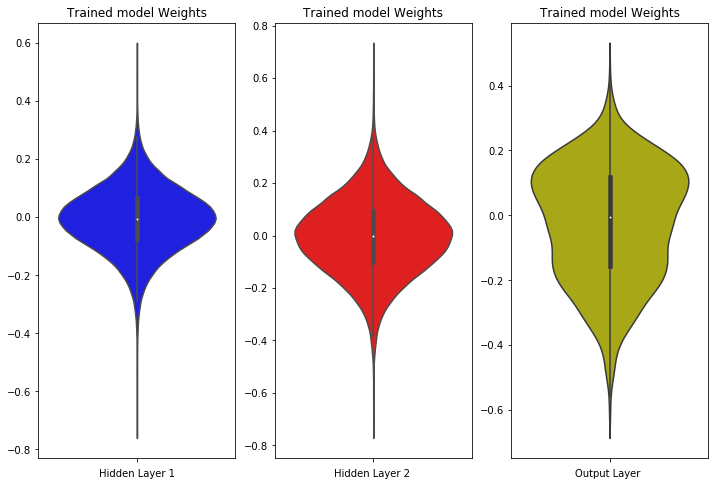

In [30]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# ADAM optimizer with Dropout and BN

In [31]:
from tensorflow.keras.layers import BatchNormalization

In [32]:
from tensorflow.keras.layers import Dropout

In [33]:
model_bd=Sequential()

#Hidden layer 1
model_bd.add(Dense(392,input_shape=(input_dim,),activation='relu',kernel_initializer=RandomNormal(mean=0,stddev=0.071,seed=None)))
model_bd.add(BatchNormalization())
model_bd.add(Dropout(0.5))

#Hidden layer 2
model_bd.add(Dense(196,activation='relu',kernel_initializer=RandomNormal(mean=0,stddev=0.101,seed=None)))
model_bd.add(BatchNormalization())
model_bd.add(Dropout(0.5))

#Output layer
model_bd.add(Dense(output_dim,activation='softmax'))

In [34]:
model_bd.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 392)               307720    
_________________________________________________________________
batch_normalization (BatchNo (None, 392)               1568      
_________________________________________________________________
dropout (Dropout)            (None, 392)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 196)               77028     
_________________________________________________________________
batch_normalization_1 (Batch (None, 196)               784       
_________________________________________________________________
dropout_1 (Dropout)          (None, 196)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [35]:
model_bd.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
history2=model_bd.fit(X_train,Y_train,batch_size=batch_size,epochs=nb_epoch,verbose=1,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 4s 65us/sample - loss: 0.5166 - accuracy: 0.8424 - val_loss: 0.1694 - val_accuracy: 0.9467
Epoch 2/25
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2360 - accuracy: 0.9279 - val_loss: 0.1196 - val_accuracy: 0.9624
Epoch 3/25
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1823 - accuracy: 0.9445 - val_loss: 0.1034 - val_accuracy: 0.9674
Epoch 4/25
60000/60000 [==============================] - 3s 54us/sample - loss: 0.1525 - accuracy: 0.9535 - val_loss: 0.0889 - val_accuracy: 0.9720
Epoch 5/25
60000/60000 [==============================] - 6s 104us/sample - loss: 0.1333 - accuracy: 0.9582 - val_loss: 0.0848 - val_accuracy: 0.9754
Epoch 6/25
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1206 - accuracy: 0.9626 - val_loss: 0.0835 - val_accuracy: 0.9748
Epoch 7/25
60000/60000 [==============================]

In [36]:
score1=model_bd.evaluate(X_test,Y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [37]:
print(history2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


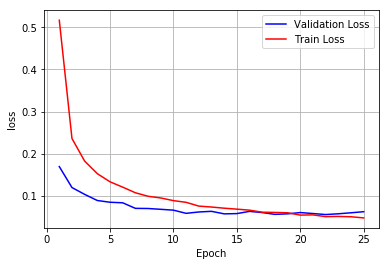

In [38]:
#Plotting the model
fig1,ax1=plt.subplots(1,1)
ax1.set_xlabel('Epoch'),ax1.set_ylabel("loss")
x1=list(range(1,nb_epoch+1))
vy1=history2.history['val_loss']
ty1=history2.history['loss']
plt_dynamic(x1,vy1,ty1,ax1)

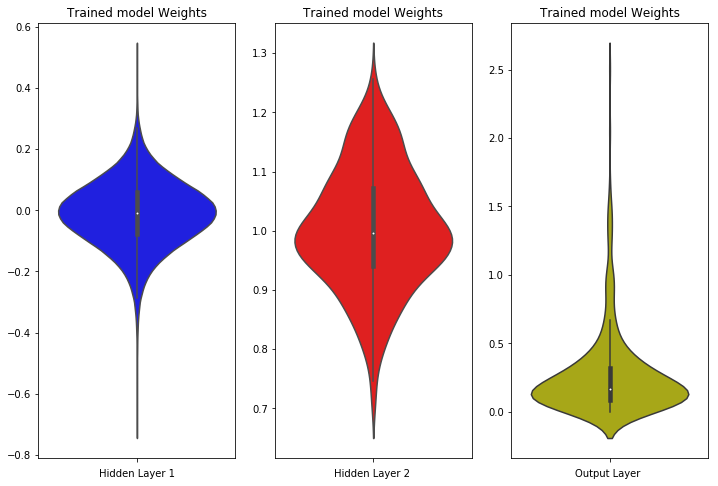

In [39]:
w_after1 = model_bd.get_weights()

h1_w = w_after1[0].flatten().reshape(-1,1)
h2_w = w_after1[2].flatten().reshape(-1,1)
out_w = w_after1[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 3 Hidden Layers + Relu + Adam

In [40]:
model_3=Sequential()

#Hidden layer 1
model_3.add(Dense(392,input_shape=(input_dim,),activation='relu',kernel_initializer=RandomNormal(mean=0,stddev=0.071,seed=None)))

#hidden layer 2
model_3.add(Dense(250,activation='relu',kernel_initializer=RandomNormal(mean=0,stddev=0.089,seed=None)))

#hidden layer 3
model_3.add(Dense(150,activation='relu',kernel_initializer=RandomNormal(mean=0,stddev=0.115,seed=None)))

#output layer
model_3.add(Dense(output_dim,activation='softmax'))

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_7 (Dense)              (None, 250)               98250     
_________________________________________________________________
dense_8 (Dense)              (None, 150)               37650     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1510      
Total params: 445,130
Trainable params: 445,130
Non-trainable params: 0
_________________________________________________________________


In [41]:
model_3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history3=model_3.fit(X_train,Y_train,batch_size=batch_size,epochs=nb_epoch,verbose=1,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2489 - accuracy: 0.9248 - val_loss: 0.1070 - val_accuracy: 0.9680
Epoch 2/25
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0855 - accuracy: 0.9735 - val_loss: 0.0777 - val_accuracy: 0.9749
Epoch 3/25
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0554 - accuracy: 0.9823 - val_loss: 0.0793 - val_accuracy: 0.9767
Epoch 4/25
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0363 - accuracy: 0.9879 - val_loss: 0.0773 - val_accuracy: 0.9766
Epoch 5/25
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0282 - accuracy: 0.9906 - val_loss: 0.0761 - val_accuracy: 0.9792
Epoch 6/25
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0228 - accuracy: 0.9924 - val_loss: 0.0805 - val_accuracy: 0.9785
Epoch 7/25
60000/60000 [==============================] 

In [42]:
score2=model_3.evaluate(X_test,Y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [43]:
print(history3.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


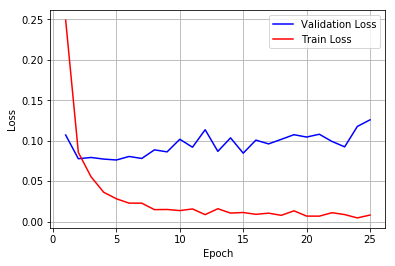

In [44]:
#plotting the model 
fig,ax2=plt.subplots(1,1)
ax2.set_xlabel('Epoch'),ax2.set_ylabel('Loss')
x2=list(range(1,nb_epoch+1))
vy2=history3.history['val_loss']
ty2=history3.history['loss']
plt_dynamic(x2,vy2,ty2,ax2)

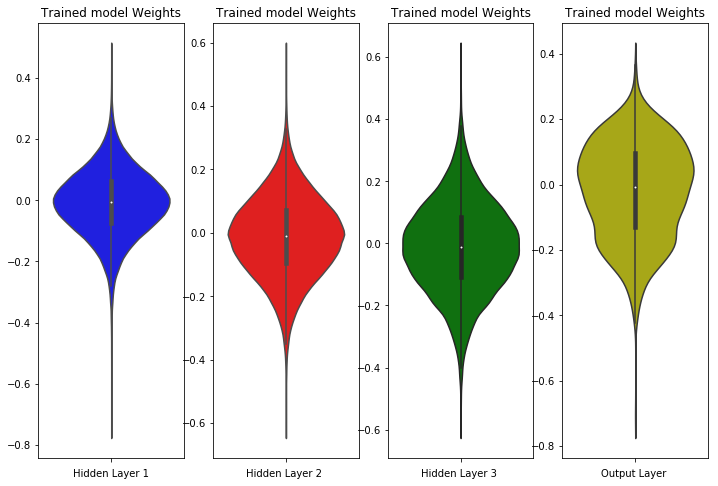

In [45]:
#plotting the weights
w_after2 = model_3.get_weights()

h1_w = w_after2[0].flatten().reshape(-1,1)
h2_w = w_after2[2].flatten().reshape(-1,1)
h3_w = w_after2[4].flatten().reshape(-1,1)
out_w = w_after2[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# Adam + relu + BN + Dropout

In [46]:
model_3_bd=Sequential()
#Hidden layer 1
model_3_bd.add(Dense(392,input_shape=(input_dim,),activation='relu',kernel_initializer=RandomNormal(mean=0,stddev=0.071,seed=None)))
model_3_bd.add(BatchNormalization())
model_3_bd.add(Dropout(0.5))


#hidden layer 2
model_3_bd.add(Dense(250,activation='relu',kernel_initializer=RandomNormal(mean=0,stddev=0.089,seed=None)))
model_3_bd.add(BatchNormalization())
model_3_bd.add(Dropout(0.5))


#hidden layer 3
model_3_bd.add(Dense(125,activation='relu',kernel_initializer=RandomNormal(mean=0,stddev=0.126,seed=None)))
model_3_bd.add(BatchNormalization())
model_3_bd.add(Dropout(0.5))

#output layer
model_3_bd.add(Dense(output_dim,activation='softmax'))

model_3_bd.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 392)               307720    
_________________________________________________________________
batch_normalization_2 (Batch (None, 392)               1568      
_________________________________________________________________
dropout_2 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 250)               98250     
_________________________________________________________________
batch_normalization_3 (Batch (None, 250)               1000      
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 125)              

In [47]:
model_3_bd.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history4=model_3_bd.fit(X_train,Y_train,batch_size=batch_size,epochs=nb_epoch,verbose=1,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 7s 117us/sample - loss: 0.6976 - accuracy: 0.7832 - val_loss: 0.2043 - val_accuracy: 0.9383
Epoch 2/25
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2979 - accuracy: 0.9119 - val_loss: 0.1406 - val_accuracy: 0.9565
Epoch 3/25
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2255 - accuracy: 0.9335 - val_loss: 0.1142 - val_accuracy: 0.9658
Epoch 4/25
60000/60000 [==============================] - 6s 92us/sample - loss: 0.1920 - accuracy: 0.9440 - val_loss: 0.1020 - val_accuracy: 0.9696
Epoch 5/25
60000/60000 [==============================] - 6s 94us/sample - loss: 0.1624 - accuracy: 0.9523 - val_loss: 0.0930 - val_accuracy: 0.9735
Epoch 6/25
60000/60000 [==============================] - 6s 92us/sample - loss: 0.1431 - accuracy: 0.9581 - val_loss: 0.0896 - val_accuracy: 0.9739
Epoch 7/25
60000/60000 [==============================]

In [48]:
score3=model_3_bd.evaluate(X_test,Y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

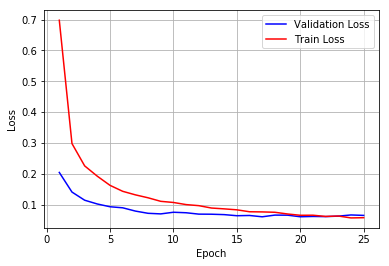

In [49]:
fig,ax3=plt.subplots(1,1)
ax3.set_xlabel('Epoch'),ax3.set_ylabel('Loss')
x3=list(range(1,nb_epoch+1))
vy3=history4.history['val_loss']
ty3=history4.history['loss']
plt_dynamic(x3,vy3,ty3,ax3)

# 5 Hidden layers + ADAM + Relu

In [50]:
model_5=Sequential()

#Hidden layer 1
model_5.add(Dense(525,input_shape=(input_dim,),activation='relu',kernel_initializer=RandomNormal(mean=0,stddev=0.061,seed=None)))

#hidden layer 2
model_5.add(Dense(430,activation='relu',kernel_initializer=RandomNormal(mean=0,stddev=0.068,seed=None)))

#hidden layer 3
model_5.add(Dense(360,activation='relu',kernel_initializer=RandomNormal(mean=0,stddev=0.074,seed=None)))

#hidden layer 4
model_5.add(Dense(250,activation='relu',kernel_initializer=RandomNormal(mean=0,stddev=0.089,seed=None)))

#hidden layer 5
model_5.add(Dense(150,activation='relu',kernel_initializer=RandomNormal(mean=0,stddev=0.115,seed=None)))

#output layer
model_5.add(Dense(output_dim,activation='softmax'))

model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 525)               412125    
_________________________________________________________________
dense_15 (Dense)             (None, 430)               226180    
_________________________________________________________________
dense_16 (Dense)             (None, 360)               155160    
_________________________________________________________________
dense_17 (Dense)             (None, 250)               90250     
_________________________________________________________________
dense_18 (Dense)             (None, 150)               37650     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1510      
Total params: 922,875
Trainable params: 922,875
Non-trainable params: 0
________________________________________________

In [51]:
model_5.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history5=model_5.fit(X_train,Y_train,batch_size=batch_size,epochs=nb_epoch,verbose=1,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 8s 129us/sample - loss: 0.2200 - accuracy: 0.9326 - val_loss: 0.1323 - val_accuracy: 0.9567
Epoch 2/25
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0865 - accuracy: 0.9733 - val_loss: 0.0926 - val_accuracy: 0.9720
Epoch 3/25
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0607 - accuracy: 0.9801 - val_loss: 0.1108 - val_accuracy: 0.9679
Epoch 4/25
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0426 - accuracy: 0.9863 - val_loss: 0.1005 - val_accuracy: 0.9719
Epoch 5/25
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0398 - accuracy: 0.9870 - val_loss: 0.0908 - val_accuracy: 0.9746
Epoch 6/25
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0324 - accuracy: 0.9897 - val_loss: 0.0846 - val_accuracy: 0.9754
Epoch 7/25
60000/60000 [==========================

In [52]:
score4=model_5.evaluate(X_test,Y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

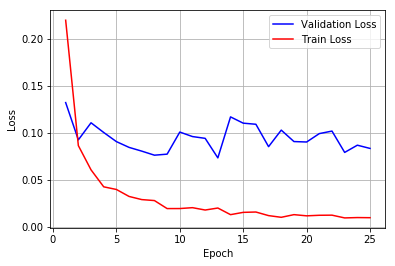

In [53]:
fig,ax4=plt.subplots(1,1)
ax4.set_xlabel('Epoch'),ax4.set_ylabel('Loss')
x4=list(range(1,nb_epoch+1))
vy4=history5.history['val_loss']
ty4=history5.history['loss']
plt_dynamic(x4,vy4,ty4,ax4)

# 5 HL + Adam + Relu + BN + Dropout

In [54]:
model_5_bd=Sequential()

#Hidden layer 1
model_5_bd.add(Dense(525,input_shape=(input_dim,),activation='relu',kernel_initializer=RandomNormal(mean=0,stddev=0.061,seed=None)))
model_5_bd.add(BatchNormalization())
model_5_bd.add(Dropout(0.5))


#hidden layer 2
model_5_bd.add(Dense(430,activation='relu',kernel_initializer=RandomNormal(mean=0,stddev=0.068,seed=None)))
model_5_bd.add(BatchNormalization())
model_5_bd.add(Dropout(0.5))

#hidden layer 3
model_5_bd.add(Dense(360,activation='relu',kernel_initializer=RandomNormal(mean=0,stddev=0.074,seed=None)))
model_5_bd.add(BatchNormalization())
model_5_bd.add(Dropout(0.5))


#hidden layer 4
model_5_bd.add(Dense(250,activation='relu',kernel_initializer=RandomNormal(mean=0,stddev=0.089,seed=None)))
model_5_bd.add(BatchNormalization())
model_5_bd.add(Dropout(0.5))


#hidden layer 5
model_5_bd.add(Dense(150,activation='relu',kernel_initializer=RandomNormal(mean=0,stddev=0.115,seed=None)))
model_5_bd.add(BatchNormalization())
model_5_bd.add(Dropout(0.5))


#output layer
model_5_bd.add(Dense(output_dim,activation='softmax'))

model_5_bd.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 525)               412125    
_________________________________________________________________
batch_normalization_5 (Batch (None, 525)               2100      
_________________________________________________________________
dropout_5 (Dropout)          (None, 525)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 430)               226180    
_________________________________________________________________
batch_normalization_6 (Batch (None, 430)               1720      
_________________________________________________________________
dropout_6 (Dropout)          (None, 430)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 360)              

In [55]:
model_5_bd.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history6=model_5_bd.fit(X_train,Y_train,batch_size=batch_size,epochs=nb_epoch,verbose=1,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 13s 211us/sample - loss: 1.0178 - accuracy: 0.6869 - val_loss: 0.2567 - val_accuracy: 0.9254
Epoch 2/25
60000/60000 [==============================] - 11s 176us/sample - loss: 0.3530 - accuracy: 0.8971 - val_loss: 0.1627 - val_accuracy: 0.9525
Epoch 3/25
60000/60000 [==============================] - 11s 178us/sample - loss: 0.2586 - accuracy: 0.9275 - val_loss: 0.1386 - val_accuracy: 0.9598
Epoch 4/25
60000/60000 [==============================] - 11s 179us/sample - loss: 0.2115 - accuracy: 0.9406 - val_loss: 0.1156 - val_accuracy: 0.9663
Epoch 5/25
60000/60000 [==============================] - 11s 180us/sample - loss: 0.1843 - accuracy: 0.9483 - val_loss: 0.1118 - val_accuracy: 0.9682
Epoch 6/25
60000/60000 [==============================] - 11s 179us/sample - loss: 0.1643 - accuracy: 0.9539 - val_loss: 0.1011 - val_accuracy: 0.9720
Epoch 7/25
60000/60000 [====================

In [56]:
score5=model_5_bd.evaluate(X_test,Y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

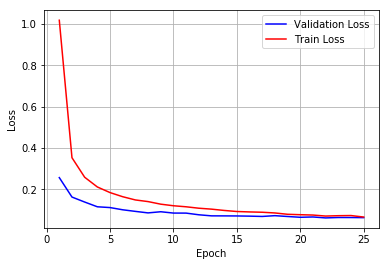

In [57]:
fig,ax5=plt.subplots(1,1)
ax5.set_xlabel('Epoch'),ax5.set_ylabel('Loss')
x5=list(range(1,nb_epoch+1))
vy5=history6.history['val_loss']
ty5=history6.history['loss']
plt_dynamic(x5,vy5,ty5,ax5)

In [58]:
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adadelta,Adagrad

In [59]:
def best_hyperparameters(activ):

    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [62]:
activ=['sigmoid','relu']
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
model=KerasClassifier(build_fn=best_hyperparameters,epochs=nb_epoch,batch_size=batch_size,verbose=0)
param_grid=dict(activ=activ)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train)

C:\Users\jhatu\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.